In [1]:
import cv2
import numpy as np
import os

In [4]:
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    return edges

def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (0, height),
        (width, height),
        (width, height // 2),
        (0, height // 2),
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    cropped_edges = cv2.bitwise_and(edges, mask)
    return cropped_edges

def detect_lines(cropped_edges):
    lines = cv2.HoughLinesP(cropped_edges, 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    return lines

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

def add_weighted(image, line_image):
    return cv2.addWeighted(image, 0.8, line_image, 1, 1)

def process_images_in_folder(folder_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            edges = process_image(image)
            roi_edges = region_of_interest(edges)
            lines = detect_lines(roi_edges)
            line_image = display_lines(image, lines)
            combo_image = add_weighted(image, line_image)
            
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, combo_image)
            print(f"Processed and saved: {output_path}")
            
folder_path = 'C://Users//jb pavi//Downloads//frames'
# Path to the folder where processed images will be saved
output_folder = 'C://Users//jb pavi//Downloads//processed_frames'
process_images_in_folder(folder_path, output_folder)

Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000000_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000001_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000002_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000003_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000004_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000005_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000006_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000007_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000008_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000009_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000010_img.jpg
Processed and saved: C://Users//jb pavi//Downloads//processed_frames\000011_

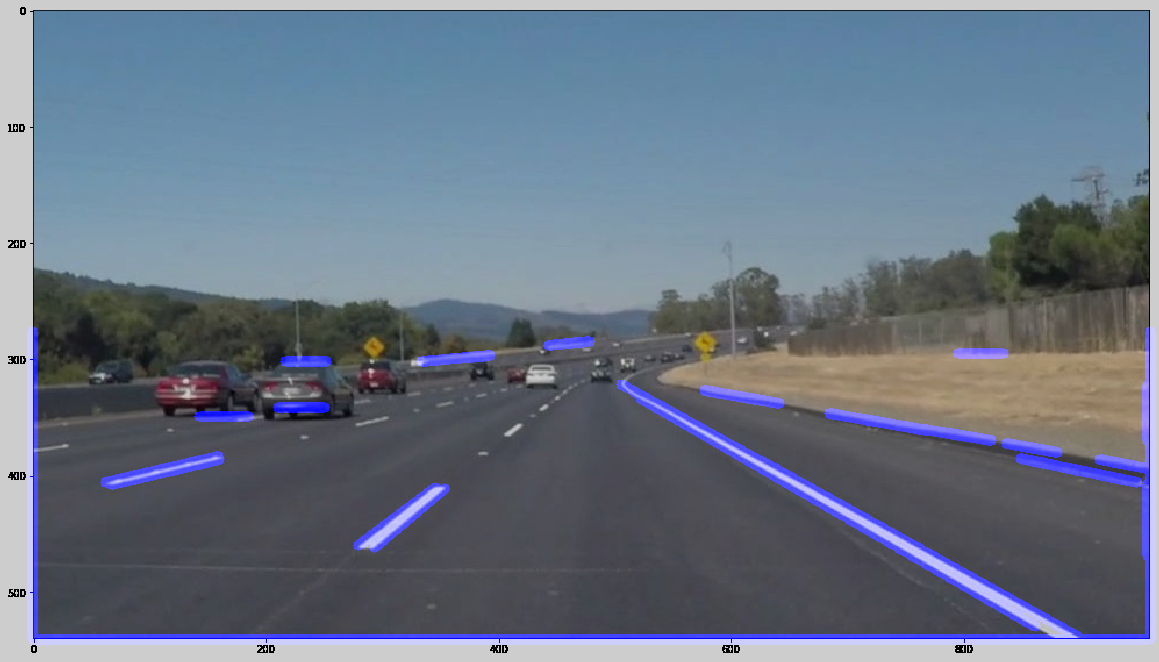

In [8]:
from IPython.display import display
from PIL import Image
import cv2
import numpy as np

def process_and_display_image(image_path):
    image = cv2.imread(image_path)
    edges = process_image(image)
    roi_edges = region_of_interest(edges)
    lines = detect_lines(roi_edges)
    line_image = display_lines(image, lines)
    combo_image = add_weighted(image, line_image)
    
    # Convert BGR image to RGB
    combo_image_rgb = cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB)
    
    # Convert to PIL Image for display
    combo_image_pil = Image.fromarray(combo_image_rgb)
    
    # Display the image
    display(combo_image_pil)

# Path to the single image file
image_path = 'sample for road lane.png'
process_and_display_image(image_path)
